# JHUPIEGO - RISE DATA DISCOVERY

# Import Libraries

In [2]:
import pandas as pd
import datetime as dt
import warnings
import os
# get parent user path
user_dev_path = os.path.dirname(os.getcwd())
# get parent path for package
package_path = os.path.dirname(user_dev_path)
import seaborn as sns
import numpy as np
import yaml
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

**Working Functions**

In [3]:
def check_null_values(df):
    if df is not None:
        try:
            missing_value = df.isnull().sum()
            mis_val_percent = 100 * df.isnull().sum() / len(df)
            mis_val_table = pd.concat([missing_value, mis_val_percent], axis=1)
            mis_val_table_rename_cols = mis_val_table.rename(
                columns={0: "Missing Values", 1: "% of Total Values"}
            )
            mis_val_table_rename_cols = (
                mis_val_table_rename_cols[mis_val_table_rename_cols.iloc[:, 1] != 0]
                .sort_values("% of Total Values", ascending=False)
                .round(1)
            )
            print(
                "There are "
                + str(mis_val_table_rename_cols.shape[0])
                + " columns that have missing values"
            )
            return mis_val_table_rename_cols
        except Exception as e:
            print(f"Exception on checking missing values with error: {e}")
            
def load_excel_sheet(path: str):
    if path is not None:
        try:
            xls = pd.ExcelFile(path)
            df = xls.parse(skiprows=0)
            return df
        except Exception as e:
            print(f"Exception on loading excel spreadsheet with error: {e}")
            
def date_visit_conversion(df,visit_col: str,visit_year: str, visit_month: str):
    if df is not None:
        try:
            df = df.copy()
            df[visit_col] = pd.to_datetime(df[visit_col],errors='coerce')
            df[visit_year] = df[visit_col].dt.year
            df[visit_month] = df[visit_col].dt.month
            return df
        except Exception as e:
            print(f"Exception on converting visit date with error: {e}") 
            
def plot_visit_date(df, primary_key: str, data_name: str):
    if df is not None:
        df_sub = df.query("VISIT_YEAR > 1990 and VISIT_YEAR < 2022")
        df_sub_slice = df_sub.groupby("VISIT_YEAR").agg(
            {primary_key: lambda x: x.nunique()}
        )
        df_sub_slice.reset_index(inplace=True)
        df_sub_slice["VISIT_YEAR"] = df_sub_slice["VISIT_YEAR"].astype("int")
        ax_sub = sns.barplot(x="VISIT_YEAR", y=primary_key, data=df_sub_slice)
        ax_sub.set(xlabel="Year of Visit", ylabel="Number of Patient Visits")
        ax_sub.set_title(f"'Trend of Yearly Patient Visits:{data_name}'")
        plt.xticks(rotation=60)
        
def convert_to_datetime(df,date_col: str):
    if df is not None:
        try:
            df[date_col] = pd.to_datetime(df[date_col],errors='coerce')
            return df
        except Exception as e:
            print(f"Exception on converting to datetime with error: {e}")      

def print_min_max_dates(df,date_col: str,type_date: str):
    if df is not None:
        return print(f" The earliest {type_date} date is: {df[date_col].min()}, and the most recent {type_date} date is {df[date_col].max()}") 
    
def print_num_rows_cols(df, df_name: str):
        if df is not None:
            return print(f"{df_name} data has {df.shape[1]} columns and {df.shape[0]} rows.") 

## Loading Data

In [4]:
 try: 
    with open (user_dev_path + '/' + 'config_LTFU.yaml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print(f'Error reading the config file, {e}')

In [5]:
input_root = config['rise_files']['raw_data_path']
clinic_file = config['rise_files']['raw_clinic_file']
clinic_input = input_root + clinic_file
print(clinic_input)

/data/rise_data/ClinicData.xlsx


In [3]:
# # Clinic Data
df_clin_data = load_excel_sheet(clinic_input)

## Initial Summary

### Clinic Data

In [81]:
print_num_rows_cols(df_clin_data, 'Clinic')

Clinic data has 38 columns and 924862 rows.


In [5]:
df_clin_data['func_status'].value_counts()

Working                      724348
ASYMPTOMATIC                 148870
Ambulatory                    11974
ASYMPTOMATIC,ASYMPTOMATIC      8064
Bedridden                      1568
SYMPTOMATIC                    1295
Bed ridden                      198
SYMPTOMATIC,SYMPTOMATIC          58
Bed ridden,Bed ridden             3
Name: func_status, dtype: int64

In [7]:
df_clin_data['tb_status'].value_counts()

No sign or symptoms of TB                                                                                                            655222
No signs or symptoms of TB                                                                                                           145490
Currently on INH prophylaxis                                                                                                          30046
TB suspected and referred for evaluation                                                                                              14564
No signs or symptoms of TB,No signs or symptoms of TB                                                                                  7861
Currently on TB treatment                                                                                                              3853
Patient with signs and symptoms of TB                                                                                                  3729
No signs or symptoms

In [9]:
df_clin_data['COMMENCE'].value_counts()

0    778645
1    146217
Name: COMMENCE, dtype: int64

In [10]:
df_clin_data['CLINIC_STAGE'].value_counts()

Stage I      464139
Stage II     183395
Stage III     79953
Stage IV       6467
Stage II?        27
Stage IIo         2
Stage IId         2
Stage IIt         1
Stage IIe         1
Stage IIn         1
Stage IIk         1
Stage IIi         1
Name: CLINIC_STAGE, dtype: int64

In [6]:
df_clin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924862 entries, 0 to 924861
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  924862 non-null  object 
 1   name.1                924862 non-null  object 
 2   name.2                924862 non-null  object 
 3   CLINIC_ID             924862 non-null  int64  
 4   PATIENT_ID            924862 non-null  int64  
 5   FACILITY_ID           924862 non-null  int64  
 6   DATE_VISIT            924862 non-null  object 
 7   CLINIC_STAGE          733990 non-null  object 
 8   func_status           896378 non-null  object 
 9   tb_status             863328 non-null  object 
 10  VIRAL_LOAD            924862 non-null  int64  
 11  CD4                   924862 non-null  float64
 12  CD4P                  924862 non-null  float64
 13  REGIMENTYPE           148972 non-null  object 
 14  REGIMEN               148876 non-null  object 
 15  

In [9]:
check_null_values(df_clin_data)

There are 22 columns that have missing values


Missing Values  % of Total Values
covid_confirmed               924862              100.0
GESTATIONAL_AGE               924862              100.0
STI_IDS                       924862              100.0
STI_TREATED                   924862              100.0
date_covid_confirmed          924862              100.0
ADR_IDS                       924810              100.0
OI_IDS                        923912               99.9
ADHERE_IDS                    923328               99.8
LMP                           921987               99.7
MATERNAL_STATUS_ART           917313               99.2
offered_index                 843825               91.2
REGIMEN                       775986               83.9
REGIMENTYPE                   775890               83.9
NOTES                         760323               82.2
BP                            467247               50.5
ADR_SCREENED                  387249               41.9
OI_SCREENED                   383469               41.5
ADHERENCE_LEVEL               375454               40.6
CLINIC_STAGE                  190872               20.6
tb_status                      61534                6.7
func_status                    28484                3.1
NEXT_APPOINTMENT               26099                2.8

In [83]:
df_clin_data[df_clin_data.duplicated(['CLINIC_ID'])]

Empty DataFrame
Columns: [name, name.1, name.2, CLINIC_ID, PATIENT_ID, FACILITY_ID, DATE_VISIT, CLINIC_STAGE, func_status, tb_status, VIRAL_LOAD, CD4, CD4P, REGIMENTYPE, REGIMEN, BODY_WEIGHT, HEIGHT, WAIST, BP, PREGNANT, LMP, BREASTFEEDING, OI_SCREENED, STI_IDS, STI_TREATED, OI_IDS, ADR_SCREENED, ADR_IDS, ADHERENCE_LEVEL, ADHERE_IDS, COMMENCE, covid_confirmed, date_covid_confirmed, offered_index, NEXT_APPOINTMENT, NOTES, GESTATIONAL_AGE, MATERNAL_STATUS_ART]
Index: []

[0 rows x 38 columns]

In [84]:
df_clin_data[df_clin_data.duplicated(['PATIENT_ID'])].agg('count')

name                    792784
name.1                  792784
name.2                  792784
CLINIC_ID               792784
PATIENT_ID              792784
FACILITY_ID             792784
DATE_VISIT              792784
CLINIC_STAGE            614912
func_status             767560
tb_status               748080
VIRAL_LOAD              792784
CD4                     792784
CD4P                    792784
REGIMENTYPE              76615
REGIMEN                  76551
BODY_WEIGHT             792784
HEIGHT                  792784
WAIST                   792784
BP                      404252
PREGNANT                792784
LMP                       2502
BREASTFEEDING           792784
OI_SCREENED             493898
STI_IDS                      0
STI_TREATED                  0
OI_IDS                     857
ADR_SCREENED            490581
ADR_IDS                     48
ADHERENCE_LEVEL         501867
ADHERE_IDS                1371
COMMENCE                792784
covid_confirmed              0
date_cov

In [6]:
visits = df_clin_data[['PATIENT_ID','DATE_VISIT']].groupby('PATIENT_ID').count().reset_index().groupby('DATE_VISIT').count().reset_index().sort_values('DATE_VISIT')

Text(0.5, 1.0, 'Number of Clinical visit per patient')

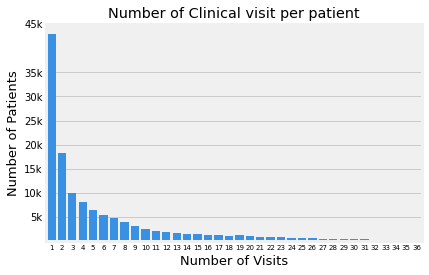

In [10]:
ave_visits1 = visits.query('DATE_VISIT < 37')
fig = sns.barplot(ave_visits1['DATE_VISIT'].astype('int'), ave_visits1['PATIENT_ID'].astype('int') , color='dodgerblue')
plt.xticks(fontsize=7)
plt.yticks(ticks=[5000,10000,15000,20000,25000,30000,35000,45000], labels=['5k','10k','15k','20k','25k','30k','35k','45k'], fontsize=10)
plt.xlabel('Number of Visits', fontsize=13)
plt.ylabel('Number of Patients', fontsize=13)
plt.title('Number of Clinical visit per patient')

#### Clinical Visits Validation

In [55]:
df_clin = df_clin_data.copy()
df_clin['DATE_VISIT'] = pd.to_datetime(df_clin['DATE_VISIT'],errors='coerce')
df_clin['NEXT_APPOINTMENT'] = pd.to_datetime(df_clin['NEXT_APPOINTMENT'],errors='coerce')

0   2020-06-06
1   2017-05-27
2   2020-03-19
Name: DATE_VISIT, dtype: datetime64[ns]

In [56]:
df_clin['VISIT_APPOINTMENT_DAYS'] = df_clin['NEXT_APPOINTMENT'] - df_clin['DATE_VISIT']
df_clin['VISIT_APPOINTMENT_DAYS_ACTUAL'] = df_clin['VISIT_APPOINTMENT_DAYS']/np.timedelta64(1, 'D')
df_clin['VISIT_APPOINTMENT_DAYS_ACTUAL'] = df_clin['VISIT_APPOINTMENT_DAYS_ACTUAL'].fillna(0.0)
df_clin['VISIT_APPOINTMENT_DAYS_ACTUAL'] = df_clin['VISIT_APPOINTMENT_DAYS_ACTUAL'].astype('int')

Text(0.5, 1.0, 'Distribution of Days between Visit and Next Appointment')

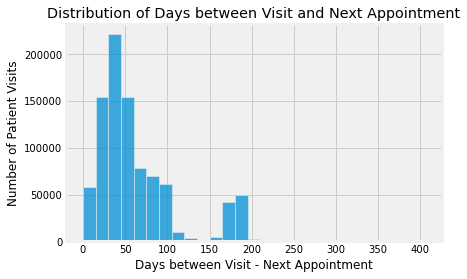

In [61]:
df_new1 =  df_new.query("VISIT_APPOINTMENT_DAYS_ACTUAL >= 0 and VISIT_APPOINTMENT_DAYS_ACTUAL <= 400")
ax_new = sns.histplot(data=df_new1, x="VISIT_APPOINTMENT_DAYS_ACTUAL", binwidth=15)
ax_new.set(xlabel='Days between Visit - Next Appointment', ylabel='Number of Patient Visits')
ax_new.set_title("Distribution of Days between Visit and Next Appointment")

In [83]:
df_new1.VISIT_APPOINTMENT_DAYS_ACTUAL.median(),round(df_new1.VISIT_APPOINTMENT_DAYS_ACTUAL.mean(),2)

(56.0, 64.13)

In [84]:
print(f" Number patient visits with next appointment dates is: {len(df_new1.VISIT_APPOINTMENT_DAYS_ACTUAL)}")

 Number patient visits with next appointment dates is: 888191


In [64]:
df_new.DATE_VISIT.head()

0   2020-06-06
1   2017-05-27
2   2020-03-19
3   2019-01-01
4   2020-05-25
Name: DATE_VISIT, dtype: datetime64[ns]

In [75]:
check = df_new.query("DATE_VISIT < '2021-05-31'")

In [76]:
check.DATE_VISIT.max()

Timestamp('2021-05-30 00:00:00')

In [72]:
len(df_new.query("DATE_VISIT > '2021-05-31'"))

55

In [85]:
df_new1['VISIT_YEAR'] = df_new1['DATE_VISIT'].dt.year
df_new1['VISIT_MONTH'] = df_new1['DATE_VISIT'].dt.month

<ipython-input-85-2ada4cef47e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['VISIT_YEAR'] = df_new1['DATE_VISIT'].dt.year
<ipython-input-85-2ada4cef47e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['VISIT_MONTH'] = df_new1['DATE_VISIT'].dt.month


In [86]:
df_new12 = df_new1.query("VISIT_YEAR > 2018 and VISIT_YEAR < 2022")

In [87]:
df_new12['VISIT_YEAR'] = df_new12['VISIT_YEAR'].astype('str')

<ipython-input-87-2d47c690d188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new12['VISIT_YEAR'] = df_new12['VISIT_YEAR'].astype('str')


Text(0.5, 1.0, 'Distribution of Days between Visit and Next Appointment')

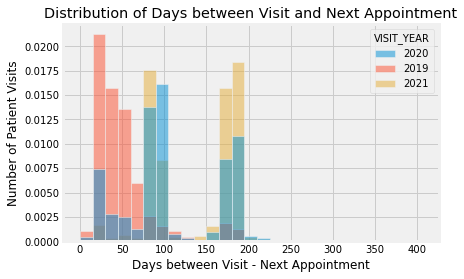

In [93]:
#df_new1 =  df_new12.query("VISIT_APPOINTMENT_DAYS_ACTUAL >= 0 and VISIT_APPOINTMENT_DAYS_ACTUAL <= 400")
ax_new1 = sns.histplot(data=df_new12, x="VISIT_APPOINTMENT_DAYS_ACTUAL", binwidth=15,hue='VISIT_YEAR',stat="density", common_norm=False)
ax_new1.set(xlabel='Days between Visit - Next Appointment', ylabel='Number of Patient Visits')
ax_new1.set_title("Distribution of Days between Visit and Next Appointment")

In [94]:
df_new12['appoint_bins'] = pd.cut(x=df_new12['VISIT_APPOINTMENT_DAYS_ACTUAL'], bins=[0,14,29,44,59,74,90,105,400])

<ipython-input-94-ce4965352307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new12['appoint_bins'] = pd.cut(x=df_new12['VISIT_APPOINTMENT_DAYS_ACTUAL'], bins=[0,14,29,44,59,74,90,105,400])


In [96]:
df_new12.groupby("appoint_bins")["CLINIC_ID"].count()

appoint_bins
(0, 14]         3661
(14, 29]       78340
(29, 44]       49499
(44, 59]       43200
(59, 74]       19610
(74, 90]       77804
(90, 105]      40040
(105, 400]    108177
Name: CLINIC_ID, dtype: int64

In [20]:
df_clin['VISIT_YEAR'] = df_clin['DATE_VISIT'].dt.year
df_clin['VISIT_MONTH'] = df_clin['DATE_VISIT'].dt.month

In [20]:
print(f" The earliest visit date is: {df_clin['DATE_VISIT'].min()}, and the most recent date is {df_clin['DATE_VISIT'].max()}")

 The earliest visit date is: 1934-06-07 00:00:00, and the most recent date is 2220-09-25 00:00:00


In [21]:
df_clin_subset = df_clin.query("VISIT_YEAR > 1990 and VISIT_YEAR < 2022")

In [22]:
print(f" The earliest visit date is: {df_clin_subset['DATE_VISIT'].min()}, and the most recent date is {df_clin_subset['DATE_VISIT'].max()}")

 The earliest visit date is: 1997-07-08 00:00:00, and the most recent date is 2021-09-30 00:00:00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1997'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2021')])

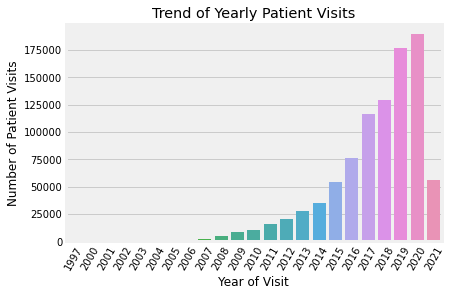

In [28]:
df_clinic_slice = df_clin_subset.groupby('VISIT_YEAR').agg({'CLINIC_ID':lambda x: x.nunique()})
df_clinic_slice.reset_index(inplace=True)
df_clinic_slice['VISIT_YEAR'] = df_clinic_slice['VISIT_YEAR'].astype('int')
ax_clinic = sns.barplot(x = 'VISIT_YEAR',y='CLINIC_ID',data=df_clinic_slice)
ax_clinic.set(xlabel='Year of Visit', ylabel='Number of Patient Visits')
ax_clinic.set_title('Trend of Yearly Patient Visits')
plt.xticks(rotation=60)

In [24]:
df_clinic_slice

VISIT_YEAR  CLINIC_ID
0         1997          3
1         2000         18
2         2001         38
3         2002        116
4         2003         21
5         2004         25
6         2005         85
7         2006        531
8         2007       2058
9         2008       4561
10        2009       8418
11        2010      10278
12        2011      15479
13        2012      20754
14        2013      27768
15        2014      35251
16        2015      53901
17        2016      76214
18        2017     116621
19        2018     128915
20        2019     176905
21        2020     189595
22        2021      56440

In [39]:
df_clin.groupby("VISIT_MONTH")["CLINIC_ID"].count()

VISIT_MONTH
Apr    83305
Aug    83658
Dec    61535
Feb    69022
Jan    69317
Jul    75643
Jun    77235
Mar    88051
May    81924
Nov    67148
Oct    84147
Sep    83064
Name: CLINIC_ID, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Apr'),
  Text(1, 0, 'Aug'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'Feb'),
  Text(4, 0, 'Jan'),
  Text(5, 0, 'Jul'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Mar'),
  Text(8, 0, 'May'),
  Text(9, 0, 'Nov'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Sep')])

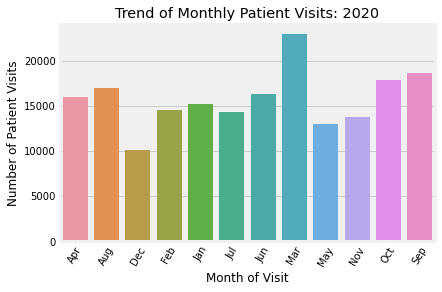

In [42]:
df_clinic_slice1 = df_clin_subset.query("VISIT_YEAR == 2020").groupby('VISIT_MONTH').agg({'CLINIC_ID':lambda x: x.nunique()})
df_clinic_slice1.reset_index(inplace=True)
df_clinic_slice1['VISIT_MONTH'] = df_clinic_slice1['VISIT_MONTH'].astype('int')
ax_clinic1 = sns.barplot(x = 'VISIT_MONTH',y='CLINIC_ID',data=df_clinic_slice1)
ax_clinic1.set(xlabel='Month of Visit', ylabel='Number of Patient Visits')
ax_clinic1.set_title('Trend of Monthly Patient Visits: 2020')
plt.xticks(rotation=60)

In [31]:
df_clinic_slice1

VISIT_MONTH  CLINIC_ID
0             1      69315
1             2      69011
2             3      88045
3             4      83304
4             5      81921
5             6      77226
6             7      75641
7             8      83654
8             9      83063
9            10      84140
10           11      67147
11           12      61528

##### One Row per Patient Check

In [49]:
df_clin_data.groupby(['PATIENT_ID'])["CLINIC_ID"].count().sort_values(ascending=False)

PATIENT_ID
57275     167
59134     161
58568     158
57464     148
58974     142
         ... 
60948       1
60939       1
60936       1
60934       1
160854      1
Name: CLINIC_ID, Length: 132078, dtype: int64

In [63]:
print(f" The earliest visit date for patient 57275 is: {df_clin_data.query('PATIENT_ID == 57275').DATE_VISIT.min()}, whilst the most recent date is: {df_clin_data.query('PATIENT_ID == 57275').DATE_VISIT.max()}")

 The earliest visit date for patient 57275 is: 2013-08-17 00:00:00, whilst the most recent date is: 2021-04-29 00:00:00


In [61]:
len(df_clin_data.query("PATIENT_ID == 57275"))

167